In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd
from tqdm import tqdm

In [ ]:
# Unzip dataset
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz -O urban8k.tgz
!tar -xzf urban8k.tgz
!rm urban8k.tgz

--2022-10-01 16:23:26--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘urban8k.tgz’

urban8k.tgz         100%[===================>]   5.61G  19.4MB/s    in 5m 8s   

2022-10-01 16:28:36 (18.6 MB/s) - ‘urban8k.tgz’ saved [6023741708/6023741708]



In [ ]:
!cat /content/drive/MyDrive/UrbanSound8K/UrbanSound8K_README.txt

UrbanSound8K

Created By
----------

Justin Salamon*^, Christopher Jacoby* and Juan Pablo Bello*
* Music and Audio Research Lab (MARL), New York University, USA
^ Center for Urban Science and Progress (CUSP), New York University, USA
http://serv.cusp.nyu.edu/projects/urbansounddataset
http://marl.smusic.nyu.edu/
http://cusp.nyu.edu/

Version 1.0


Description
-----------

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, 
children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, and street_music. The classes are 
drawn from the urban sound taxonomy described in the following article, which also includes a detailed description of 
the dataset and how it was compiled:

J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 
22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

All excerpts are taken from field recordings uploaded to www.freesou

In [ ]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/content/drive/MyDrive/UrbanSound8K/audio', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [ ]:
dataset_df = create_dataset_df('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
dataset_df.head(15)

,slice_file_name,fsID,start,end,salience,fold,classID,class,filepath
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,/content/drive/MyDrive/UrbanSound8K/audio/fold...
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing,/content/drive/MyDrive/UrbanSound8K/audio/fold...
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,/content/drive/MyDrive/UrbanSound8K/audio/fold...


In [ ]:
dataset_df.shape

(8732, 9)

In [ ]:
dataset_df.groupby('class').slice_file_name.count().sort_values()

class
gun_shot             374
car_horn             429
siren                929
air_conditioner     1000
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
jackhammer          1000
street_music        1000
Name: slice_file_name, dtype: int64

In [ ]:
# Class Distribution

appended = []
for i in range(1,11):
    appended.append(dataset_df[dataset_df.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution["index"] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,children_playing,street_music,air_conditioner,drilling,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


Normalized data range from -1 to 1: [-1.2300530e-05  1.0874721e-05  6.1941719e-06 ...  5.5496511e-03
  4.8649921e-03  5.0760419e-03] 

Librosa Sample rate: 22050 



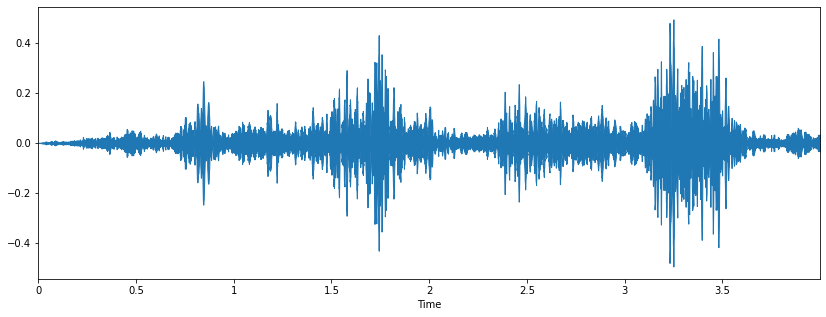

In [ ]:
### Street Music

"""
By default, Librosa’s load function will convert the sampling rate to 22.05khz, 
as well as reducing the number of channels to 1(mono),
and normalise the data so that the values will range from -1 to 1.
"""
music = "/content/UrbanSound8K/audio/fold5/115239-9-0-0.wav"

data,sample_rate=librosa.load(music)

print("Normalized data range from -1 to 1:",data,"\n")
print("Librosa Sample rate:",sample_rate, "\n")

plt.figure(figsize=(14,5))
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(music)

### Sample Rate: the number of samples of audio recorded every second.

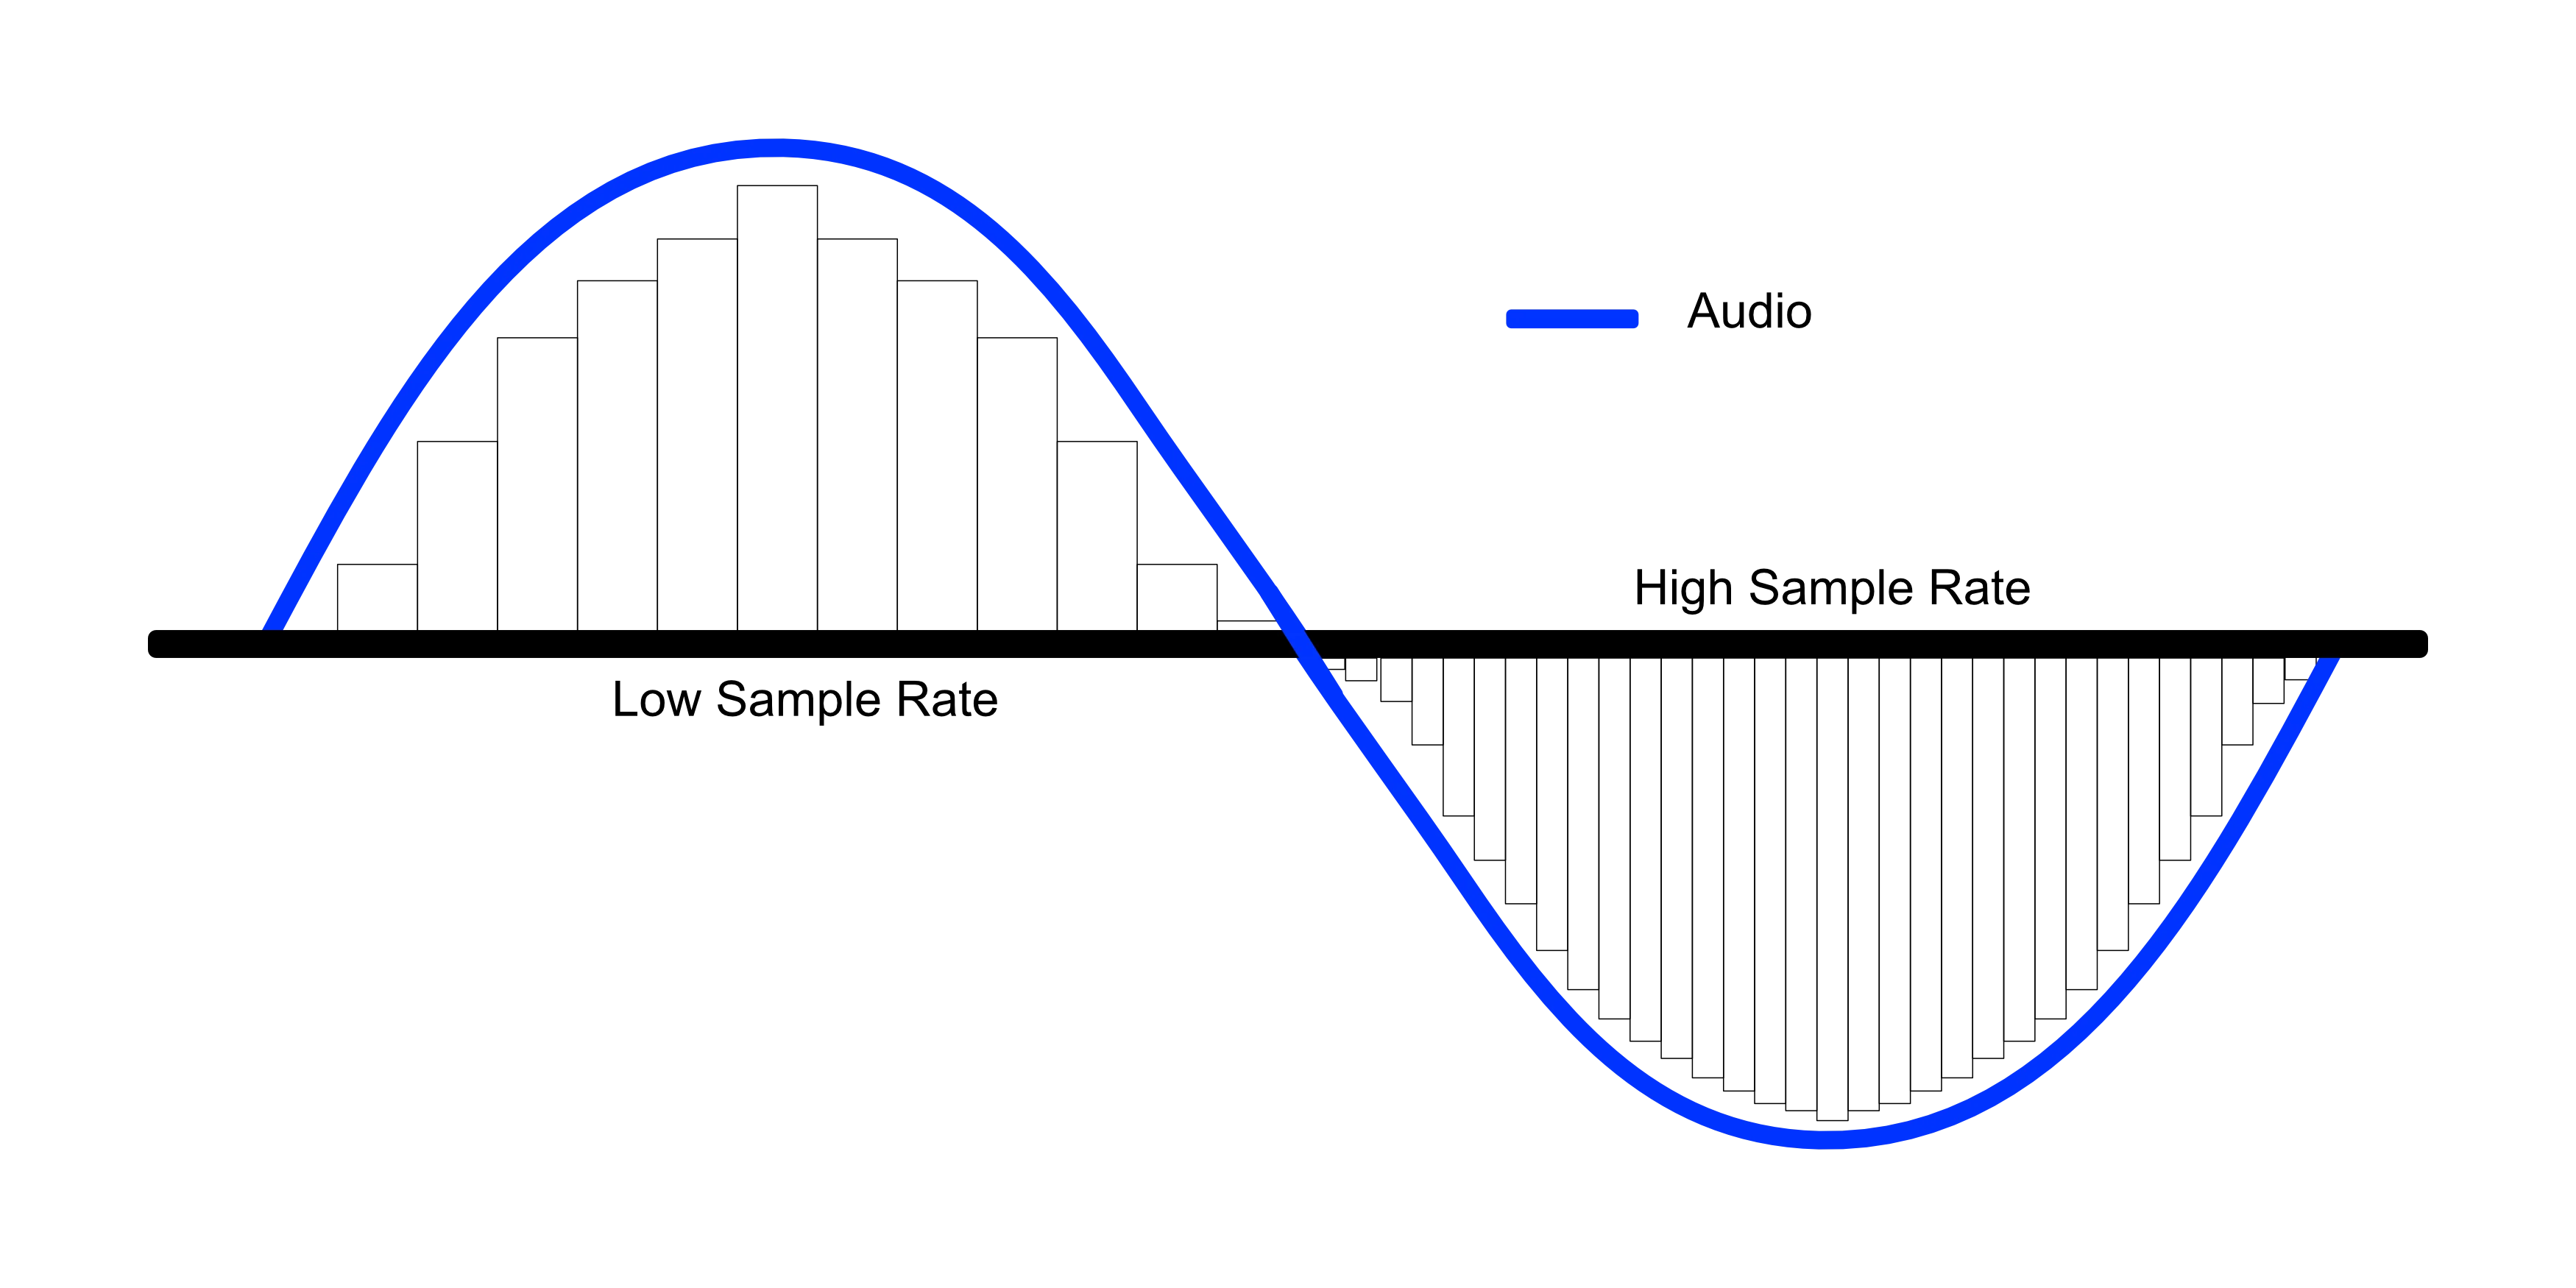

Original sample rate: 44100
Librosa (converted) sample rate: 22050



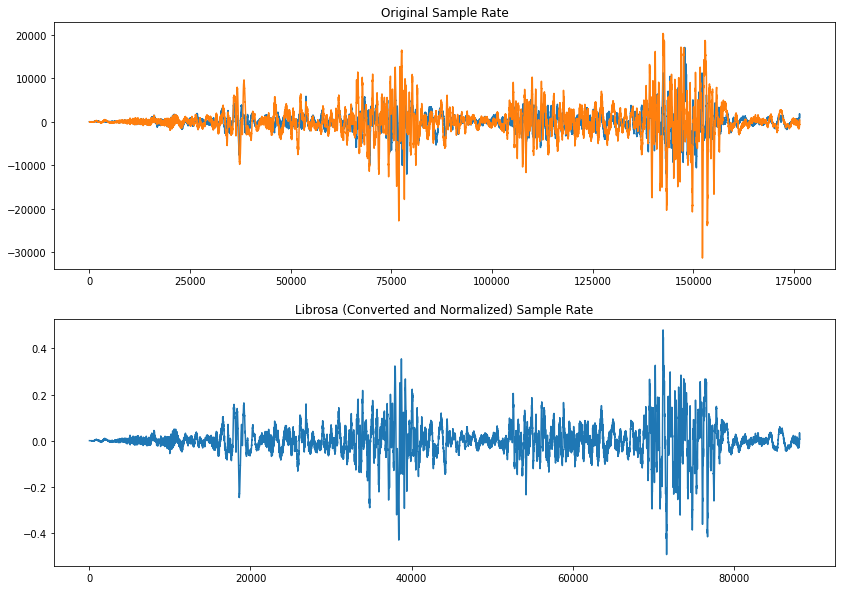

In [ ]:
from scipy.io import wavfile as wav

music = "/content/UrbanSound8K/audio/fold5/115239-9-0-0.wav"

scipy_sample_rate, scipy_load = wav.read(music)
print('Original sample rate:',scipy_sample_rate)
print("Librosa (converted) sample rate:", sample_rate)
print("")

fig, ax = plt.subplots(2, 1, figsize=(14, 10))
ax[0].plot(scipy_load)
ax[0].title.set_text("Original Sample Rate")
ax[1].plot(data)
ax[1].title.set_text("Librosa (Converted and Normalized) Sample Rate")

The graphs show that the Librosa loaded data has one channel (blue), 

while the original has two channels (orange for one channel, and blue for the other)

### Waveform for different random samples of each class

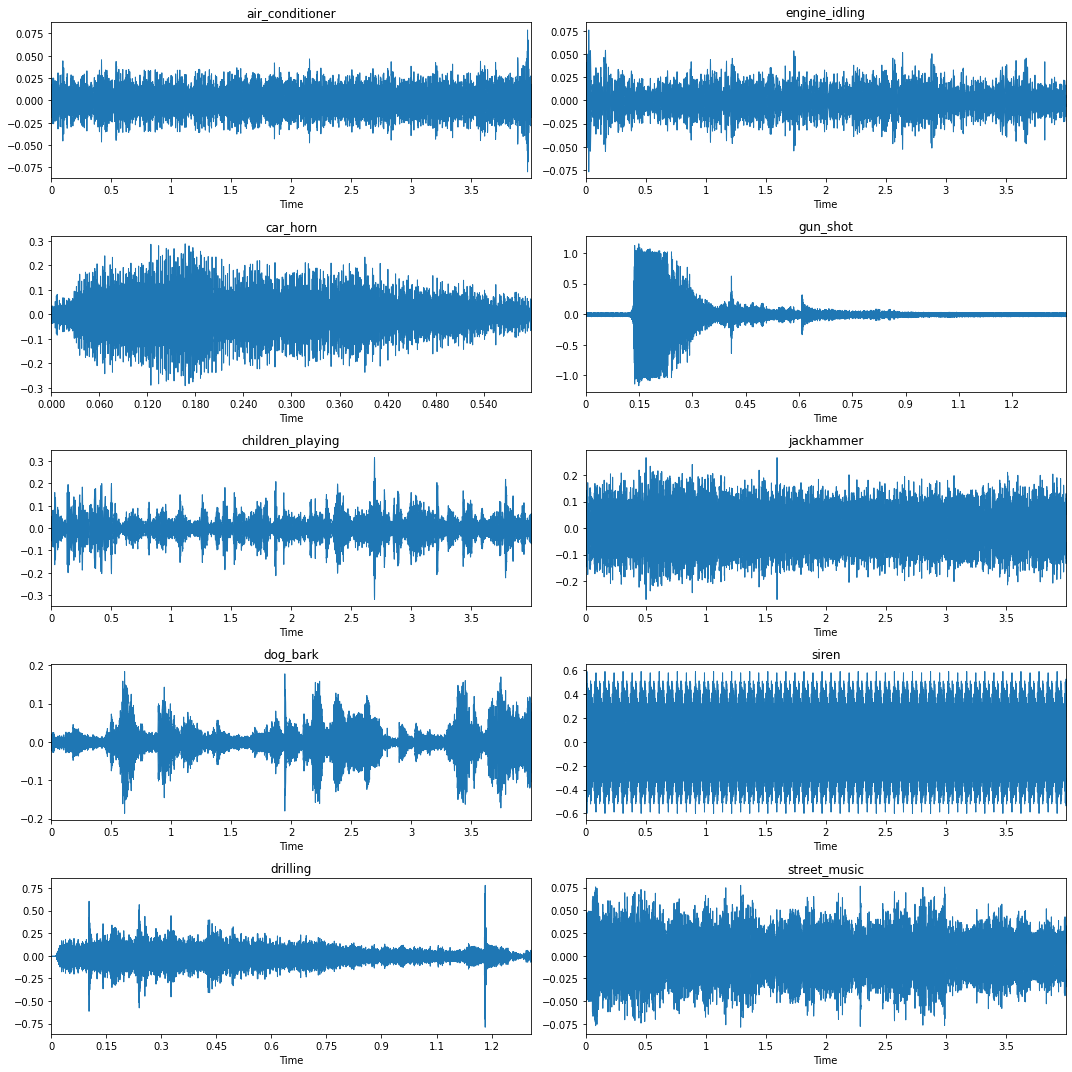

In [ ]:
# Randomly select one sample of each class
random_samples = dataset_df.groupby('class').sample(1) # Return a random sample of items from each group
audio_samples, labels = random_samples['filepath'].tolist(), random_samples['class'].tolist()

# Visualize the waveforms
#http://librosa.org/doc/0.8.1/generated/librosa.display.waveplot.html

fig, axs = plt.subplots(5, 2, figsize=(15,15))
index = 0
for col in range(2):
    for row in range(5):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        librosa.display.waveplot(audio_file, sample_rate, ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

### Mel-Spectrograms for different random samples of each class

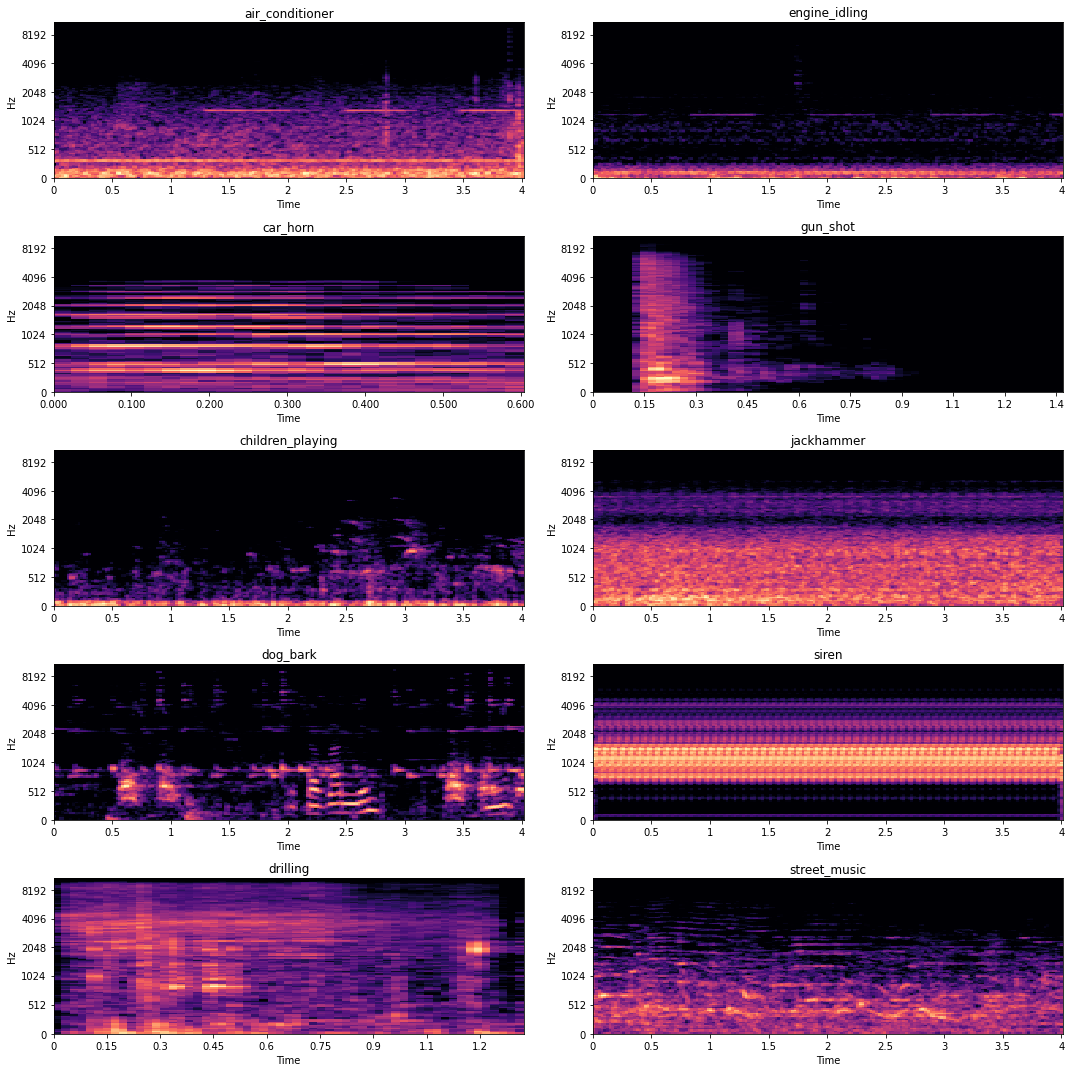

In [ ]:
# Visualize the Mel-Spectograms
# https://librosa.org/doc/main/generated/librosa.display.specshow.html

fig, axs = plt.subplots(5, 2, figsize=(15,15))
index = 0

for col in range(2):
    for row in range(5):
        # Here kaiser_fast is a technique used for faster extraction (the default is kaiser_best)
        # https://github.com/librosa/librosa/issues/460
        audio_file, sample_rate = librosa.load(audio_samples[index], res_type="kaiser_fast")
        spec = librosa.feature.melspectrogram(audio_file)
        spec_conv = librosa.amplitude_to_db(spec, ref=np.max) # Convert an amplitude spectrogram to dB-scaled spectrogram
        librosa.display.specshow(spec_conv, 
                             sr=sample_rate, # used to determine time scale in x-axis
                             #hop_length=4, # Hop length, also used to determine time scale in x-axis
                             x_axis="time", 
                             y_axis="mel",
                             ax=axs[row][col])
        
        
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1


fig.tight_layout()

In [ ]:
audio_samples

['UrbanSound8K/audio/fold6/184805-0-0-104.wav',
 'UrbanSound8K/audio/fold8/107090-1-0-0.wav',
 'UrbanSound8K/audio/fold6/137969-2-0-4.wav',
 'UrbanSound8K/audio/fold10/51024-3-0-3.wav',
 'UrbanSound8K/audio/fold2/185800-4-1-0.wav',
 'UrbanSound8K/audio/fold1/103258-5-0-17.wav',
 'UrbanSound8K/audio/fold3/34708-6-1-0.wav',
 'UrbanSound8K/audio/fold2/203929-7-4-7.wav',
 'UrbanSound8K/audio/fold8/157868-8-0-24.wav',
 'UrbanSound8K/audio/fold1/73277-9-0-24.wav']

### MEL Spectrogram Feature Extraction

In [ ]:
def create_spectrogram(file_path, n_mels=128):
    y, sr = librosa.load(file_path)
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

In [ ]:



# Iterate through all audio files and extract Mel
features = []
labels = []
frames_max = 0
counter = 0
total_samples = len(dataset_df)
n_mels=40

for index, row in dataset_df.iterrows():
    file_path = os.path.join(os.path.abspath("/content/drive/MyDrive/UrbanSound8K/audio"), 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    class_label = row["class"]

    # Extract Mel Spectrograms
    mels = create_spectrogram(file_path, n_mels=n_mels)
    
    # Save current frame count
    num_frames = mels.shape[1]
    
    # Add row (feature / label)
    features.append(mels)
    labels.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(index+1, total_samples))
        counter = 0

    counter += 1
    
print("Finished: {}/{}".format(index, total_samples))

Status: 501/8732
Status: 1001/8732
Status: 1501/8732
Status: 2001/8732
Status: 2501/8732
Status: 3001/8732
Status: 3501/8732


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]


Status: 4001/8732
Status: 4501/8732
Status: 5001/8732
Status: 5501/8732
Status: 6001/8732
Status: 6501/8732
Status: 7001/8732
Status: 7501/8732
Status: 8001/8732


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


Status: 8501/8732
Finished: 8731/8732


In [ ]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Feature labels length: {}".format(len(labels)))

Raw features length: 8732
Feature labels length: 8732


In [ ]:
# Given an numpy array of features, zero-pads each ocurrence to max_padding
def add_padding(features, max_padding=174):
    padded = []

    # Add padding
    for i in range(len(features)):
        px = features[i]
        size = len(px[0])
        # Add padding if required
        if (size < max_padding):
            xDiff = max_padding - size
            xLeft = xDiff//2
            xRight = xDiff-xLeft
            px = np.pad(px, pad_width=((0,0), (xLeft, xRight)), mode='constant')
        
        padded.append(px)

    return padded

In [ ]:
# Add padding to features with less than frames than frames_max
padded_features = add_padding(features, frames_max)

In [ ]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

np.save("/content/drive/MyDrive/UrbanSound8K/X-mel_spec", X)
np.save("/content/drive/MyDrive/UrbanSound8K/y-mel_spec", y)